In [249]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Определим функцию B-сплайна

In [250]:
def B(x, k, i, t):
    if k == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
    if t[i+k] == t[i]:
        c1 = 0.0
    else:
        c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    if t[i+k+1] == t[i+1]:
        c2 = 0.0
    else:
        c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
    return c1 + c2


## Пример системы линейных базисных сплайнов
4 базисных сплайнов

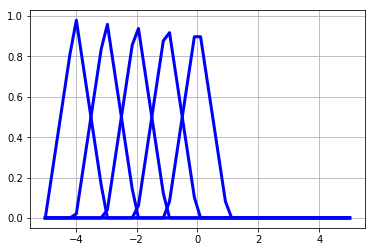

In [251]:
k = 1
t = [-5,-4,-3,-2,-1 ,0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

xx = np.linspace(-5, 5, 50)

fig, ax = plt.subplots()

for i in range (5):
    ax.plot(xx, [B(x, k, i ,t) for x in xx], 'blue', lw=3)
    
ax.grid(True)  
plt.show()

## Пример системы кубических B-сплайнов

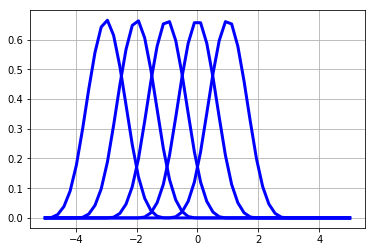

In [252]:
k = 3
fig, ax = plt.subplots()

for i in range (5):
    ax.plot(xx, [B(x, k, i ,t) for x in xx], 'blue', lw=3)
    
ax.grid(True)  

In [253]:
from scipy.misc import derivative #импортировали библиотеку для нахождения производной функции в точке

### Определим функцию, которая считает коэффициенты разложения по B-сплайнам

### Также определим функцию, которая находит искомый сглаживающий сплайн

In [254]:
# т - число точек выборки
# p - число базисных функций (B-сплайнов), которыми мы будем искать приближение
# m - степень полинома B-сплайна
# lam - параметр сглаживания

def spline (n, p, m, lam):
    M = [0] * n 
    for i in range(n): 
        M[i] = [0] * p


    #задали матрицу базисных функций
    for i in range (n):
        for k in range (p):
            M[i][k] = B(x[i],m,k, t)

    G = [0] * n 
    for i in range(n): 
        G[i] = [0] * p

    for i in range (n):
        for k in range (p):
            def j(x):
                return B(x,m,k,t)
            G[i][k] = derivative (j,x[i],dx=1e-6,n=2)

    H = np.transpose(G)

    C = [0] * p
    for i in range(p): 
        C[i] = [0] * p

    #вычислили матрицу вторых производных
    for i in range (p):
        for k in range (p):
            C[i][k]= np.dot(H[i],H[k])
   
    #посчитали вектор коэффициентов, с которыми мы будем брать B-сплайны
    S = np.dot (np.dot (np.linalg.inv(np.dot(np.transpose (M),M) + np.dot (lam, C)), np.transpose (M)), y)
    return S

def f(x):
    l = 0
    for i in range (p):
        l = l + S[i]* B(x, m, i, t)
    return l

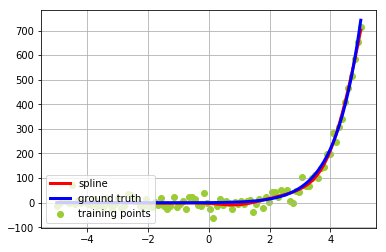

In [225]:
n=100
p = 10
m= 3
lam = 0.0025

xx = np.linspace(-5, 5, 100)
x = np.linspace(-5, 5, 100)

#настоящая функция
def g(x):
    return x*np.exp(x)

#генерация данных с шумами
y = g(x) + np.random.normal(0,1,100)*20

S = spline (n, p, m, lam)

fig, ax = plt.subplots()
plt.scatter(x, y, color = 'yellowgreen', marker='o', label="training points")
ax.plot(xx, [f(x) for x in xx], 'red', lw=3, label = 'spline')


ax.plot (xx, [g(x) for x in xx], 'blue', lw=3, label = "ground truth")
    
ax.grid(True)
plt.legend(loc='lower left')

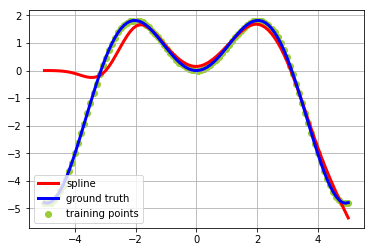

In [226]:
#настоящая функция
def g(x):
    return x*np.sin(x)

xx = np.linspace(-5, 5, 100)
x = np.linspace(-5, 5, 100)

n=100
p = 10
m= 3
lam = 0.04

#генерация данных с шумами
y = g(x) + np.random.normal(0,1,100)*0.01

S = spline (n, p, m, lam)

fig, ax = plt.subplots()
plt.scatter(x, y, color = 'yellowgreen', marker='o', label="training points")
ax.plot(xx, [f(x) for x in xx], 'red', lw=3, label = 'spline')


ax.plot (xx, [g(x) for x in xx], 'blue', lw=3, label = "ground truth")
    
ax.grid(True)
plt.legend(loc='lower left')

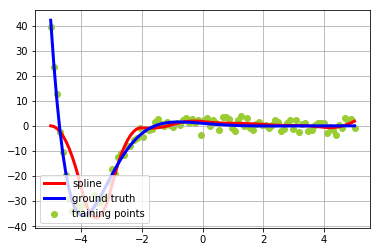

In [255]:
#настоящая функция
def g(x):
    return np.exp(-x)*np.cos(x)

xx = np.linspace(-5, 5, 100)
x = np.linspace(-5, 5, 100)

n=100
p = 11
m= 2
lam = 0.0001

#генерация данных с шумами
y = g(x) + np.random.normal(0,1,100)*2

S = spline (n, p, m, lam)

fig, ax = plt.subplots()
plt.scatter(x, y, color = 'yellowgreen', marker='o', label="training points")
ax.plot(xx, [f(x) for x in xx], 'red', lw=3, label = 'spline')


ax.plot (xx, [g(x) for x in xx], 'blue', lw=3, label = "ground truth")
    
ax.grid(True)
plt.legend(loc='lower left')

plt.savefig('1.png', format='png', dpi=1000)